In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR-employee.csv')

In [3]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
cat_cols = [col for col in df.columns if df[col].dtypes=='O']
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [6]:
dummy=pd.get_dummies(df[cat_cols],drop_first=True)

In [7]:
dummy.head(1)

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [8]:
df = df.drop(columns=cat_cols)

In [9]:
df=pd.concat([df,dummy],axis=1)

In [10]:
df.head(1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(columns='Attrition_Yes')
y = df['Attrition_Yes']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train.head(1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
285,37,1372,1,3,1,391,4,42,3,1,...,0,0,0,0,1,0,0,0,1,0


In [15]:
from sklearn import tree

In [16]:
clf=tree.DecisionTreeClassifier(max_depth=10,max_features=10,criterion='gini',splitter='random')
clfE = tree.DecisionTreeClassifier(max_depth=10,max_features=10,criterion='entropy',splitter='random')

In [17]:
clf.fit(X_train,y_train)
clfE.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                       splitter='random')

In [18]:
from sklearn.tree import export_graphviz

In [19]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None,rounded=True,filled=True)
graph=graphviz.Source(dot_data)

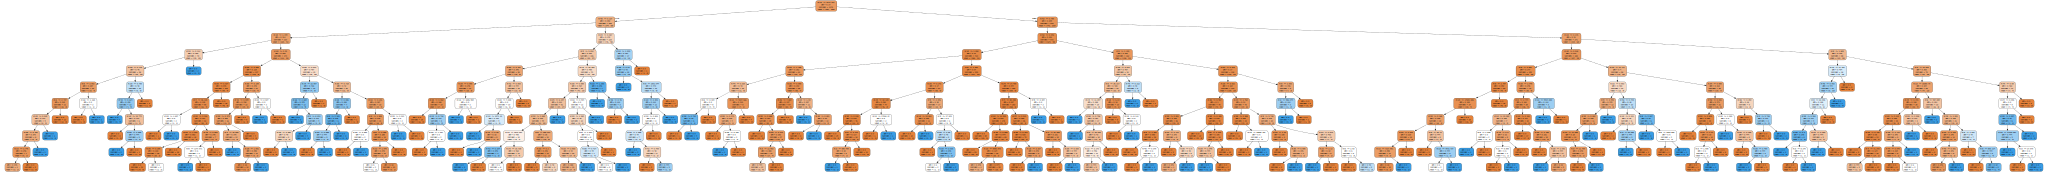

In [20]:
graph

In [21]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None,rounded=True,filled=True)
graph=graphviz.Source(dot_data)

In [22]:
y_pred=clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print('Accuracy score on train data (using Default criterionas gini):',accuracy_score(y_true=y_train,y_pred=clf.predict(X_train)))
print('Accuracy score on test data (using Default criterionas gini):',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score on train data (using Default criterionas gini): 0.9651360544217688
Accuracy score on test data (using Default criterionas gini): 0.782312925170068


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm= confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[223,  23],
       [ 41,   7]], dtype=int64)

In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       246
           1       0.23      0.15      0.18        48

    accuracy                           0.78       294
   macro avg       0.54      0.53      0.53       294
weighted avg       0.74      0.78      0.76       294



In [29]:
from sklearn.metrics import precision_score

In [30]:
pr_sc=precision_score(y_test,y_pred,average='weighted')
pr_sc

0.7448824984539271

In [31]:
from sklearn.metrics import recall_score

rc_sc = recall_score(y_test,y_pred,average='weighted')
rc_sc

0.782312925170068

In [32]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score

f1_sc = f1_score(y_test, y_pred, average='micro')
f1_sc

0.782312925170068

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
params = {'max_depth' : np.arange(1,20),
          'max_features' : np.arange(10,20),
          'criterion' : ('entropy','gini'),
          'splitter' : ('best','random'),
          'max_leaf_nodes' : list(range(2,50)),
          'min_samples_split' : [2,3,4],
          'min_samples_leaf' : list(range(5,20))}

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=2),params,cv=10)

In [37]:
# grid_search_cv.fit(X_train,y_train)

In [38]:
# grid_search_cv.best_estimator_

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
random_grid_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=2),params,cv=10)

In [42]:
random_grid_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2),
                   param_distributions={'criterion': ('entropy', 'gini'),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...],
                                        'min_samples_leaf': [5, 6, 7, 8, 9, 10,
                                                

In [44]:
random_grid_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=13,
                       max_leaf_nodes=27, min_samples_leaf=7,
                       min_samples_split=3, random_state=2)

In [45]:
clf=tree.DecisionTreeClassifier(max_depth=6,max_features=13,criterion='entropy',splitter='random',max_leaf_nodes=27,min_samples_leaf=7,min_samples_split=3,random_state=2)

In [46]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=13,
                       max_leaf_nodes=27, min_samples_leaf=7,
                       min_samples_split=3, random_state=2, splitter='random')

In [47]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None,rounded=True,filled=True)
graph=graphviz.Source(dot_data)

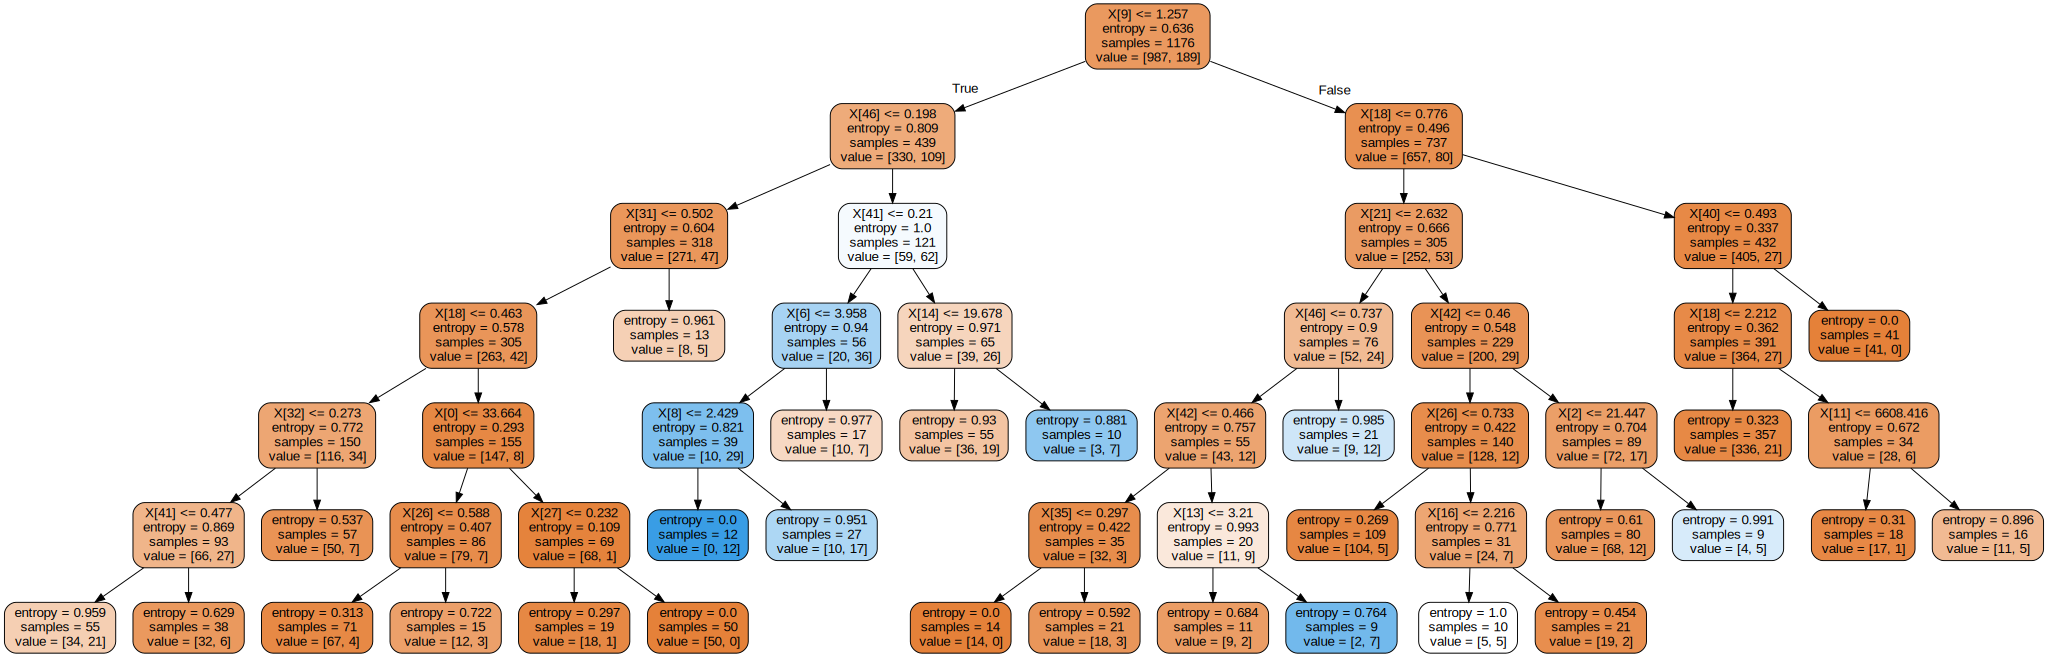

In [48]:
graph

In [49]:
y_pred=clf.predict(X_test)

In [50]:
print('Accuracy score on train data (using Default criterionas gini):',accuracy_score(y_true=y_train,y_pred=clf.predict(X_train)))
print('Accuracy score on test data (using Default criterionas gini):',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score on train data (using Default criterionas gini): 0.8664965986394558
Accuracy score on test data (using Default criterionas gini): 0.8231292517006803
